In [ ]:
import pandas as pd
from xgboost import XGBClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.under_sampling import TomekLinks
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import ClusterCentroids
# from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler

weather = pd.read_csv('weather.csv')

X=weather.iloc[:,4:8]
y=weather.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# 정규화
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 샘플링
# rus = ClusterCentroids()
rus = SMOTETomek(sampling_strategy='auto')
X_sample, y_sample = rus.fit_resample(X_train, y_train)
# sampler = RandomOverSampler()
# X_sample, y_sample = sampler.fit_resample(X_train, y_train)

# 훈련
model = XGBClassifier(
    learning_rate=0.01,
    n_estimators=200,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)
model.fit(X_sample, y_sample)

y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Print the mean squared error
print("Mean Squared Error:", mse)
print("accuracy_score:", accuracy)
print("f1_score:", f1)
print(report)

Mean Squared Error: 0.2925155004428698
accuracy_score: 0.7074844995571302
f1_score: 0.04642123382753068
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     58113
           1       0.02      0.70      0.05       595

    accuracy                           0.71     58708
   macro avg       0.51      0.71      0.44     58708
weighted avg       0.99      0.71      0.82     58708



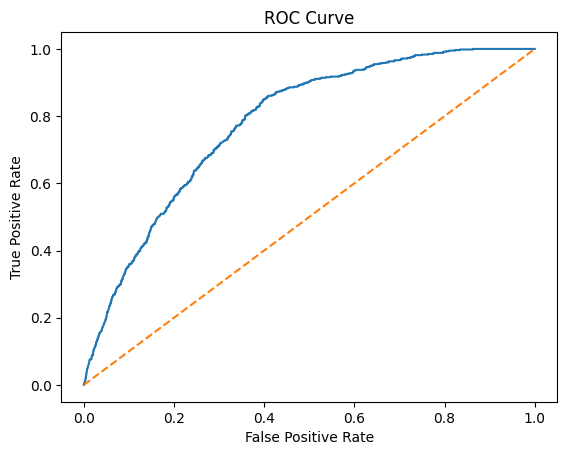

AUC: 0.7804314601789298


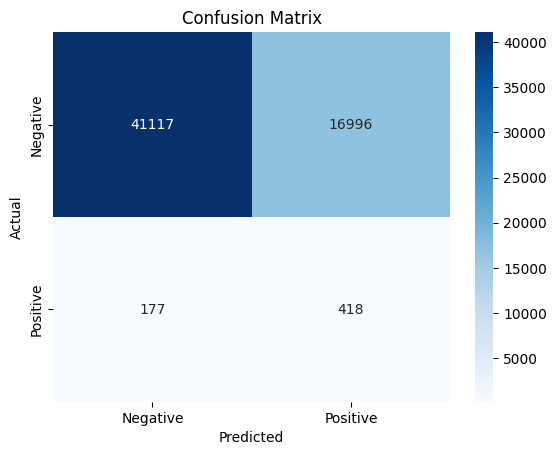

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 모델의 예측 확률을 얻습니다.
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC 곡선을 계산합니다.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC 곡선을 그립니다.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # 기준선(랜덤 추측)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC(Area Under the Curve) 값을 계산합니다.
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# 혼동 행렬을 계산합니다.
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬을 시각화합니다.
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()